In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Load the built in wine dataset

In [2]:
wine_train_x, wine_test_x, wine_train_y, wine_test_y = train_test_split(load_wine().data, load_wine().target,
                                                                        random_state=3001)

Load the USPS dataset from the file

In [3]:
USPS_training_x = np.genfromtxt("zip.train", dtype="float", usecols=np.arange(1, 257))
USPS_testing_x = np.genfromtxt("zip.test", dtype="float", usecols=np.arange(1, 257))
USPS_data = np.row_stack((USPS_training_x, USPS_testing_x))  # Concatenate the data into one dataset
USPS_training_y = np.genfromtxt("zip.train", usecols=0, dtype="int")
USPS_testing_y = np.genfromtxt("zip.test", usecols=0, dtype="int")
USPS_labels = np.append(USPS_training_y,
                        USPS_testing_y)  # Put the labels together as it is a list it can be appended together

In [4]:
USPS_train_x, USPS_test_x, USPS_train_y, USPS_test_y = train_test_split(USPS_data, USPS_labels, random_state=3001)

In [5]:
svm = SVC()
scores = cross_val_score(svm, wine_train_x, wine_train_y)
sum = 0
for i in range(0, len(scores)):
    sum = sum + scores[i]
average = sum / len(scores)
print("Run cross validation score and take the average for wine:")
print(sum / len(scores))

Run cross validation score and take the average for wine:
0.7225071225071225


In [6]:
svm.fit(wine_train_x, wine_train_y)
print("Output accuracy of SVM for the test data on wine:")  # Fit the data to the support vector machine regression
print(svm.score(wine_test_x, wine_test_y))

Output accuracy of SVM for the test data on wine:
0.6888888888888889


Run the classifier on the USPS dataset.

In [7]:
svm = SVC()
scores = cross_val_score(svm, USPS_train_x, USPS_train_y)
sum = 0
for i in range(0, len(scores)):
    sum = sum + scores[i]
average = sum / len(scores)
print("Run cross validation score and take the average for USPS:")
print(sum / len(scores))

Run cross validation score and take the average for USPS:
0.7830203174897024


In [8]:
svm.fit(USPS_train_x, USPS_train_y)
print("Output accuracy of SVM for the test data on USPS:")
print(svm.score(USPS_test_x, USPS_test_y))

Output accuracy of SVM for the test data on USPS:
0.7875268817204301


In [9]:
wineGrid = []  #Generate a search grid this can be large for wine
num = 0.001
while num < 100:
    wineGrid.append(float(num * 10))
    num = num * 10

Write a function that returns the average false P value.

In [10]:
def averageFalse(testingSet, p_val):
    correctList = []
    for i in range(0, len(testingSet)):
        for j in np.unique(testingSet):
            if testingSet[i] != j:
                correctList.append(p_val[i][j])
    sum = 0
    count = 0
    for i in correctList:
        sum = sum + i
        count = count + 1
    return sum / count

Write a function that normalises the data. This increases the accuracy.

In [11]:
lst = [Normalizer(), RobustScaler(), StandardScaler(), MinMaxScaler()]


def normalise(norm, grid, test_x, test_y, train_x, train_y):
    print("Normalising: for ", norm)
    parameters = {'svc__C': grid, 'svc__gamma': grid}
    pipe_short = make_pipeline(norm, SVC())
    grid_search = GridSearchCV(pipe_short, param_grid=parameters, cv=len(grid), n_jobs=-1)
    grid_search.fit(train_x, train_y)
    print("Accuracy:")
    print(grid_search.best_score_)
    print("Correct rate:")
    print(grid_search.score(test_x, test_y))
    print("Best parameters:")
    print(grid_search.best_params_)
    return grid_search

Try all the normalisers to see which one is the best fit.

In [12]:
wine_grids = []
for i in range(0, len(lst)):
    wine_grids.append(normalise(lst[i], wineGrid, wine_test_x, wine_test_y, wine_train_x, wine_train_y))

Normalising: for  Normalizer()
Accuracy:
0.9250712250712251
Correct rate:
0.9111111111111111
Best parameters:
{'svc__C': 100.0, 'svc__gamma': 100.0}
Normalising: for  RobustScaler()
Accuracy:
0.9846153846153847
Correct rate:
0.9555555555555556
Best parameters:
{'svc__C': 1.0, 'svc__gamma': 0.1}
Normalising: for  StandardScaler()
Accuracy:
0.9774928774928775
Correct rate:
0.9555555555555556
Best parameters:
{'svc__C': 1.0, 'svc__gamma': 0.01}
Normalising: for  MinMaxScaler()
Accuracy:
0.9849002849002849
Correct rate:
0.9333333333333333
Best parameters:
{'svc__C': 0.1, 'svc__gamma': 1.0}


Standard scalar seems to be the best fit for the wine database.

In [13]:
USPS_grid = []
num = 0.1
while num < 10:
    USPS_grid.append(float(num * 10))
    num = num * 10

In [14]:
USPS_grids = []
for i in range(0, len(lst)):
    USPS_grids.append(normalise(lst[i], USPS_grid, USPS_test_x, USPS_test_y, USPS_train_x, USPS_train_y))

Normalising: for  Normalizer()
Accuracy:
0.7830202369558532
Correct rate:
0.7875268817204301
Best parameters:
{'svc__C': 1.0, 'svc__gamma': 1.0}
Normalising: for  RobustScaler()
Accuracy:
0.7830202369558532
Correct rate:
0.7875268817204301
Best parameters:
{'svc__C': 1.0, 'svc__gamma': 1.0}
Normalising: for  StandardScaler()
Accuracy:
0.7830202369558532
Correct rate:
0.7875268817204301
Best parameters:
{'svc__C': 1.0, 'svc__gamma': 1.0}
Normalising: for  MinMaxScaler()
Accuracy:
0.7830202369558532
Correct rate:
0.7875268817204301
Best parameters:
{'svc__C': 1.0, 'svc__gamma': 1.0}


Normaliser will work for USPS dataset.

Now compute the P-Values for each of the normalisers.

In [15]:
def norm_to_p(grids, test_x, test_y, train_x, train_y, folds):
    norms = []
    for norm_grid in grids:
        print("Finding average false P value for:", lst[grids.index(norm_grid)])
        ranks = np.zeros((test_x.shape[0], folds))
        p_vals = np.zeros_like(ranks)
        for i, j in KFold(shuffle=True, random_state=0, n_splits=folds).split(train_x):
            other_x = train_x[i]
            fold_x = train_x[j]
            fold_y = train_y[j]
            other_y = train_y[i]
            norm_grid.fit(other_x, other_y)
            fold = norm_grid.decision_function(fold_x)
            test = norm_grid.decision_function(test_x)
            alpha = np.zeros(fold_x.shape[0])
            for k in range(0, fold_x.shape[0], 1):
                alpha[k] = fold[k, fold_y[k]]
            for k in range(0, test_x.shape[0], 1):
                for l in range(0, folds, 1):
                    ranks[k, l] = ranks[k, l] + np.sum(alpha <= test[k, l])
        p_vals = (ranks + 1) / (train_x.shape[0] + 1)
        norms.append(p_vals)
        print("Average false P value:",
              averageFalse(test_y, p_vals))  #Call the function defined earlier to work out average false p value
    return norms

Noe compute the average false p value for the wine dataset

In [16]:
wine_p_val = norm_to_p(wine_grids, wine_test_x, wine_test_y, wine_train_x, wine_train_y,
                       3)  #Output the average false p value

Finding average false P value for: Normalizer()
Average false P value: 0.027777777777777762
Finding average false P value for: RobustScaler()
Average false P value: 0.009784411276948604
Finding average false P value for: StandardScaler()
Average false P value: 0.00953565505804313
Finding average false P value for: MinMaxScaler()
Average false P value: 0.014676616915422892


Noe compute the average false p value for the USPS dataset

In [17]:
USPS_p_val = norm_to_p(USPS_grids, USPS_test_x, USPS_test_y, USPS_train_x, USPS_train_y, 10)

Finding average false P value for: Normalizer()
Average false P value: 0.5536965194840439
Finding average false P value for: RobustScaler()
Average false P value: 0.41710585862697047
Finding average false P value for: StandardScaler()
Average false P value: 0.48109097076398744
Finding average false P value for: MinMaxScaler()
Average false P value: 0.41611068453950545


Write a function that plots the graph

In [18]:
def grapher(num, p_vals, test_x, test_y):
    for item in p_vals:
        error_values = np.zeros(num)
        error_counter = np.zeros(num)
        for k in range(num):
            error_values[k] = k / num
            for j in range(test_x.shape[0]):
                if (item[j, test_y[j]] <= error_values[k]):
                    error_counter[k] += 1
            error_counter[k] = error_counter[k] / test_x.shape[0]
        plt.plot(error_values, error_counter)

Call the graph function for all the wine normaliser values to compare

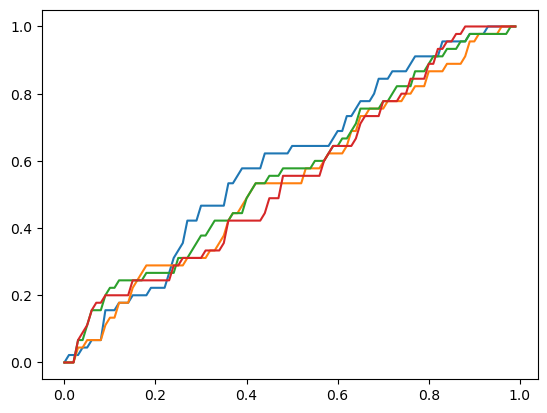

In [19]:
grapher(100, wine_p_val, wine_test_x, wine_test_y)

Call the grapher for all the USPS normalised values

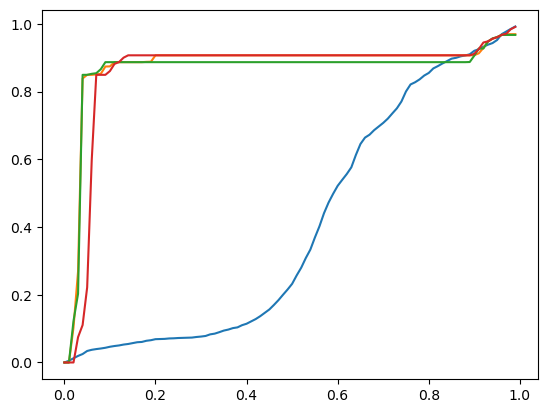

In [20]:
grapher(100, USPS_p_val, USPS_test_x, USPS_test_y)

In [21]:
def bestGraph(num, p_val, test_x, test_y):
    error_values = np.zeros(num)
    error_counter = np.zeros(num)
    for k in range(num):
        error_values[k] = k / num
        for j in range(test_x.shape[0]):
            if (p_val[j, test_y[j]] <= error_values[k]):
                error_counter[k] += 1
        error_counter[k] = error_counter[k] / test_x.shape[0]
    plt.plot(error_values, error_counter)

Now select the best normaliser for each and plot only one

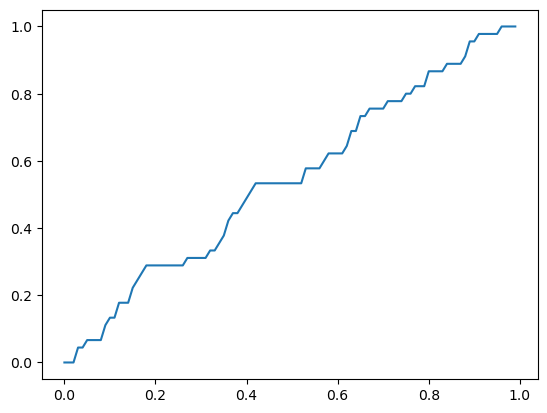

In [22]:
bestGraph(100, wine_p_val[1], wine_test_x, wine_test_y)

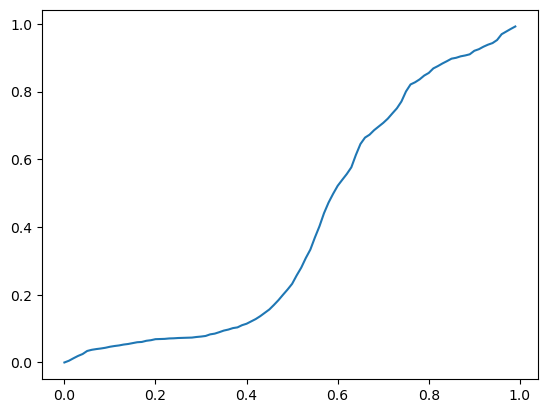

In [23]:
bestGraph(100, USPS_p_val[0], USPS_test_x, USPS_test_y)  #Normaliser